<img style="float: right" src="https://miro.medium.com/max/1200/1*l9dIvOVH5KhpK1LFvgoClA.jpeg" width="800" height="500" alt="Drawing" style="float: centre;"/>

<h3>Table_of_Content</h3>

[<h5>1.Introduction</h5>](#Introduction)

[<h5>2.Problem Statement</h5>](#Problem_Statement)

[<h5>3.Importing Packages</h5>](#Importing_Packages)

[<h5>4.Loading the data</h5>](#Loading_the_data)

[<h5>5.Exploratory data analysis</h5>](#Exploratory_data_analysis)

[<h5>6.Data cleaning and Feature engineering</h5>](#Data_cleaning_and_Feature_engineering)

[<h5>7.Modeling</h5>](#.Modeling)

[<h5>8.Model Performance</h5>](#Model_Performance)

[<h5>9.Model Explanation</h5>](#Model_Explanation)

[<h5>10.Conclussion</h5>](#Conclussion)


#**Introduction**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **import libraries**

In [26]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large list

# **load data**

In [5]:
#defining a function to display the datasets
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [6]:
movies = pd.read_csv('/content/drive/MyDrive/edsa-movie-recommendation-2022/movies.csv')
train = pd.read_csv('/content/drive/MyDrive/edsa-movie-recommendation-2022/train.csv')
genome_scores = pd.read_csv('/content/drive/MyDrive/edsa-movie-recommendation-2022/genome_scores.csv')
genome_tags= pd.read_csv('/content/drive/MyDrive/edsa-movie-recommendation-2022/genome_tags.csv')
imdb = pd.read_csv('/content/drive/MyDrive/edsa-movie-recommendation-2022/imdb_data.csv')
test = pd.read_csv('/content/drive/MyDrive/edsa-movie-recommendation-2022/test.csv')
links = pd.read_csv('/content/drive/MyDrive/edsa-movie-recommendation-2022/links.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/edsa-movie-recommendation-2022/sample_submission.csv')
tags = pd.read_csv('/content/drive/MyDrive/edsa-movie-recommendation-2022/tags.csv')

display('movies.head()', 'train.head()', 'genome_scores.head()',
        'genome_tags.head()'
       , 'imdb.head()', 'links.head()', 'sample_submission.head()',
        'tags.head()', 'test.head()')


movies.head()
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

train.head()
   userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

genome_scores.head()
   movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075

genome_tags.head()
   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

imdb.head()
   movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion  

links.head()
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

sample_submission.head()
       Id  rating
0  1_2011     1.0
1  1_4144     1.0
2  1_5767     1.0
3  1_6711     1.0
4  1_7318     1.0

tags.head()
   userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

test.head()
   userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318

### merging and preprocessing the datasets 

In [7]:
f1=pd.merge(movies, train, on='movieId')
f1.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0,833104576
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0,1442256969
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0,849667827


In [8]:
#checking for mismatches
f1.isnull().any()

movieId      False
title        False
genres       False
userId       False
rating       False
timestamp    False
dtype: bool

In [9]:
f2=pd.merge(f1,imdb , on='movieId')
f2.head()

,movieId,title,genres,userId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0,833104576,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0,1442256969,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0,849667827,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation


In [10]:
#Let's double-check whether there were any mismatches here, which we can do by looking for rows with nulls
f2.isnull().any()

movieId          False
title            False
genres           False
userId           False
rating           False
timestamp        False
title_cast        True
director          True
runtime           True
budget            True
plot_keywords     True
dtype: bool

it appears that there a null entries in our merged dataset,the nulls are surely from the imdb dataset

In [11]:
#

In [13]:
imdb.isnull().count()

movieId          27278
title_cast       27278
director         27278
runtime          27278
budget           27278
plot_keywords    27278
dtype: int64

there are 27278 nulls in each feature of the imbd dataset

In [12]:
f2[f2['title_cast'].isnull()].head()

,movieId,title,genres,userId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords
360269,111,Taxi Driver (1976),Crime|Drama|Thriller,54935,3.0,847973242,NaN,NaN,NaN,NaN,NaN
360270,111,Taxi Driver (1976),Crime|Drama|Thriller,138238,3.5,1458770087,NaN,NaN,NaN,NaN,NaN
360271,111,Taxi Driver (1976),Crime|Drama|Thriller,123844,3.0,1037853599,NaN,NaN,NaN,NaN,NaN
360272,111,Taxi Driver (1976),Crime|Drama|Thriller,161919,3.0,1547873420,NaN,NaN,NaN,NaN,NaN
360273,111,Taxi Driver (1976),Crime|Drama|Thriller,78660,4.0,940616262,NaN,NaN,NaN,NaN,NaN


In [27]:
f2.isnull().sum()

movieId                0
title                  0
genres                 0
userId                 0
rating                 0
timestamp              0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
dtype: int64

it seems like some movies are not present in the imbd dataset.

**Dealing with th nulls:**
the original data source does not have this entries,they therefore cant be seen as a miss match when we merged


# ***Exploratory Data Analysis***

In [14]:
f2.describe

<bound method NDFrame.describe of          movieId             title  \
0              1  Toy Story (1995)   
1              1  Toy Story (1995)   
2              1  Toy Story (1995)   
3              1  Toy Story (1995)   
4              1  Toy Story (1995)   
...          ...               ...   
9633026   131262  Innocence (2014)   
9633027   131262  Innocence (2014)   
9633028   131262  Innocence (2014)   
9633029   131262  Innocence (2014)   
9633030   131262  Innocence (2014)   

                                              genres  userId  rating  \
0        Adventure|Animation|Children|Comedy|Fantasy  158849     5.0   
1        Adventure|Animation|Children|Comedy|Fantasy   97203     5.0   
2        Adventure|Animation|Children|Comedy|Fantasy  161871     3.0   
3        Adventure|Animation|Children|Comedy|Fantasy   45117     4.0   
4        Adventure|Animation|Children|Comedy|Fantasy   27431     5.0   
...                                              ...     ...     ...   
96330

In [15]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9633031 entries, 0 to 9633030
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   movieId        int64  
 1   title          object 
 2   genres         object 
 3   userId         int64  
 4   rating         float64
 5   timestamp      int64  
 6   title_cast     object 
 7   director       object 
 8   runtime        float64
 9   budget         object 
 10  plot_keywords  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 881.9+ MB


In [16]:
f2.shape

(9633031, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



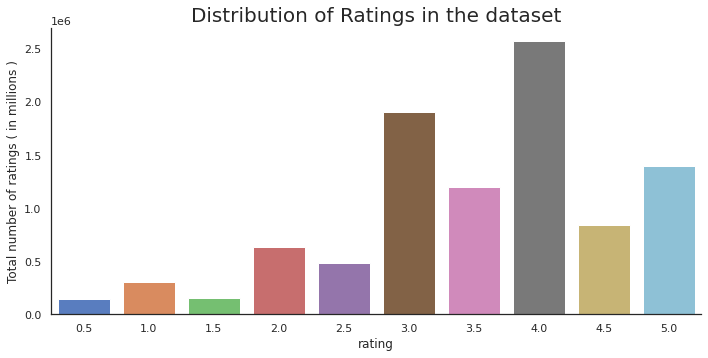

In [17]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=f2, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings ( in millions )")
    plt.title("Distribution of Ratings in the dataset", fontsize = 20)


In [18]:
print (f'Average rating in dataset: {np.mean(f2["rating"])}')

Average rating in dataset: 3.534708182710094


**Observations:**

majority of the users gave a recommendation of 4 with fewer individuals giving a rating of less than 3


#####
###
####
###

In [19]:
f2['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Action|Adventure|Animation|Comedy|Sci-Fi',
       'Animation|Children|Comedy|Western', 'Adventure|Fantasy|Horror'],
      dtype=object)

**Dimensionality reduction**

**Recommender Systems**

ValueError: ignored

#### similarity check


##### recommendations